In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle


In [3]:
tf.__version__

'1.12.0'

24.png


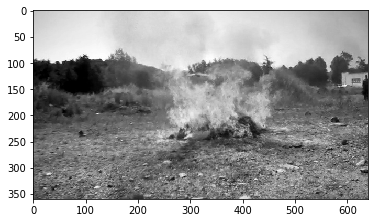

In [13]:
DATADIR = "/home/raj/AI/6-FireClear/Data/FireUniDB/color"
CATEGORIES = ["Fire","Clear"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    
    for img in os.listdir(path):
        print(img)
        bw = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(bw, cmap="gray")
        plt.show()
        break
    break

In [23]:
#print(bw)
print(bw[0][0]) #one-pixel with single-color value
print(bw.shape)

188
(360, 640)


2409.jpeg


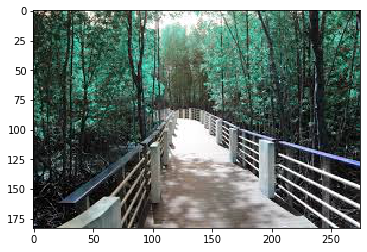

In [15]:
DATADIR = "/home/raj/AI/6-FireClear/Data/FireUniDB/color"
CATEGORIES = ["Clear","Fire"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    
    for img in os.listdir(path):
        print(img)
        clr = cv2.imread(os.path.join(path, img))
        plt.imshow(clr)
        plt.show()
        break
    break

In [20]:
#print(clr)
print(clr[0][0]) #one-pixel with RGB value
print(clr.shape)

[73 79 68]
(183, 275, 3)


(100, 100, 3)


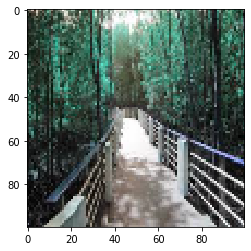

In [29]:
IMG_SIZE = 100
new_array = cv2.resize(clr, (IMG_SIZE, IMG_SIZE))
print(new_array.shape)
plt.imshow(new_array)#, cmap="gray"
plt.show()

In [30]:
all_data = []

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        #print(path)
        class_num = CATEGORIES.index(category)
        #print(class_num)
        for img in os.listdir(path):
            try:
                #print(img)
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                all_data.append([new_array, class_num])
                #break
            except Exception as e:
                pass
        #break
create_data()

In [57]:
print(len(all_data)) # list of list
print(len(all_data[0])) # list
#print(all_data[0][0])# 3D (100,100,3) matrix
print(all_data[0][0].shape) 
print(all_data[0][1])# label

8229
2
(100, 100, 3)
0


In [48]:
print(all_data[0][0].shape)

temp = all_data[0] #a list object
print(len(temp))#a list object containing a 3D matrix and a label
print(temp[0].shape)
#print(temp[0]) # the 3D (100,100,3) matrix rerpresenting the image
print(temp[1]) # the label

(100, 100, 3)
2
(100, 100, 3)
0


In [58]:
import random
random.shuffle(all_data)

In [59]:
for sample in all_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
1
0
0


In [69]:
X = []
y = []

In [70]:
for features, label in all_data:
    X.append(features)
    y.append(label)


In [71]:
print(len(X),'--', len(y))
print(type(X),'--', type(y))
print(y[0])
print(X[0].shape)

8229 -- 8229
<class 'list'> -- <class 'list'>
0
(100, 100, 3)


In [72]:
X = np.array(X)

In [73]:
print(X.shape)

(8229, 100, 100, 3)


In [76]:
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 3)  #-1 means python will figure out that dimension for you
print(X.shape)

(8229, 100, 100, 3)


In [77]:
print(len(X))
print(type(X))
print(X.shape)

8229
<class 'numpy.ndarray'>
(8229, 100, 100, 3)


In [ ]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [4]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

In [5]:
X = X/255.0

In [5]:
print(X.shape)
print(X.shape[1:])

(8229, 100, 100, 3)
(100, 100, 3)


In [84]:
print(X[0][0][0])
print(X[0][0][0][0])
print(X[0][0][0][1])
print(X[0][0][0][2])

[0.05098039 0.16470588 0.10588235]
0.050980392156862744
0.16470588235294117
0.10588235294117647


In [6]:
print(X.shape) #gives back (8229, 100, 100, 3)
print(X.shape[1:]) #get everything from index 1 onwards (100, 100, 3)
print(X.shape[2:]) #get everything from index 2 onwards (100, 3)
print(X.shape[3:]) #get everything from index 3 onwards (3)
print(X.shape[4:])

(8229, 100, 100, 3)
(100, 100, 3)
(100, 3)
(3,)
()


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
print(X.shape,'--',len(y))
print(X_train.shape,'--',len(y_train))
print(X_test.shape,'--',len(y_test))

(8229, 100, 100, 3) -- 8229
(6583, 100, 100, 3) -- 6583
(1646, 100, 100, 3) -- 1646


In [14]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))   
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))

model.add(Activation("sigmoid"))

model.compile(optimizer='adam',
               loss='binary_crossentropy',
                 metrics=['accuracy'])

In [16]:
model.fit(X_train,y_train,epochs=5)

model.evaluate(X_test,y_test)

Epoch 1/5
6583/6583 [==============================] - 2s 344us/step - loss: 0.0417 - acc: 0.9854
Epoch 2/5
6583/6583 [==============================] - 2s 349us/step - loss: 0.0234 - acc: 0.9913
Epoch 3/5
6583/6583 [==============================] - 2s 347us/step - loss: 0.0240 - acc: 0.9921
Epoch 4/5
6583/6583 [==============================] - 2s 343us/step - loss: 0.0347 - acc: 0.9871
Epoch 5/5
1646/1646 [==============================] - 0s 218us/step


[0.17234459977497557, 0.9665856619941507]

In [8]:
model.fit(X, y, batch_size=32, validation_split = 0.1)

Train on 7406 samples, validate on 823 samples
Epoch 1/1
7406/7406 [==============================] - 6s 775us/step - loss: 0.1871 - acc: 0.9365 - val_loss: 0.1040 - val_acc: 0.9587


In [9]:
model.fit(X, y, batch_size=32, epochs =3, validation_split = 0.1)

Train on 7406 samples, validate on 823 samples
Epoch 1/3
7406/7406 [==============================] - 3s 367us/step - loss: 0.0982 - acc: 0.9645 - val_loss: 0.1175 - val_acc: 0.9635
Epoch 2/3
7406/7406 [==============================] - 3s 368us/step - loss: 0.0716 - acc: 0.9733 - val_loss: 0.1416 - val_acc: 0.9623
Epoch 3/3
7406/7406 [==============================] - 3s 366us/step - loss: 0.0576 - acc: 0.9797 - val_loss: 0.0629 - val_acc: 0.9806
